In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


In [2]:
data= []

time = []

curr_X = []
curr_Y = []

delta_X = []
delta_Y = []

delta_time = []

disp = []

nonX = []
nonY = []
nonS = []


for i in range(2,3):
    participant = i
    zeros = 4 - len(str(participant))
    data.append(pd.read_csv("data\Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t"))


    time.append(data[-1]['Eyetracker timestamp'])
    curr_X.append(data[-1]['Gaze point X'])
    curr_Y.append(data[-1]['Gaze point Y'])
    delta_X.append(np.diff(curr_X[-1]))
    delta_Y.append(np.diff(curr_Y[-1]))
    delta_time.append(np.diff(time[-1]))
    disp.append(np.sqrt(np.diff(curr_X[-1])**2 + np.diff(curr_Y[-1])**2))
    #speed.append(disp[-1]/delta_time[-1])

    #remove NaN/missing
    #nonX.append(d_X[-1][np.logical_not(np.isnan(d_X[-1]))])
    #nonY.append(d_Y[-1][np.logical_not(np.isnan(d_Y[-1]))])
    #nonS.append(d_S[-1][np.logical_not(np.isnan(d_S[-1]))])


In [3]:
#print(len(speed))
print(len(curr_X))

1


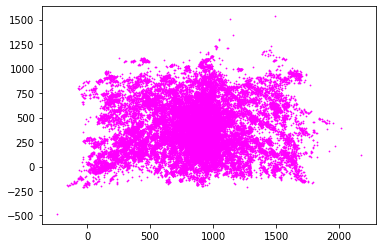

In [3]:
plt.scatter(curr_X, curr_Y,s=0.6,c='magenta')
plt.show()

In [4]:
print(time)
print(delta_time)
print(curr_Y)
print(delta_Y)
print(curr_X)
print(delta_X)

[0                 NaN
1        4.683059e+08
2        4.683142e+08
3        4.683225e+08
4        4.683309e+08
             ...     
46551    1.224266e+09
46552    1.224275e+09
46553    1.224283e+09
46554    1.224291e+09
46555             NaN
Name: Eyetracker timestamp, Length: 46556, dtype: float64]
[array([  nan, 8308., 8301., ..., 8332., 8369.,   nan])]
[0           NaN
1        1037.0
2           NaN
3        1074.0
4        1071.0
          ...  
46551     627.0
46552     650.0
46553     639.0
46554     626.0
46555       NaN
Name: Gaze point Y, Length: 46556, dtype: float64]
[array([ nan,  nan,  nan, ..., -11., -13.,  nan])]
[0          NaN
1        412.0
2          NaN
3        305.0
4        296.0
         ...  
46551    940.0
46552    926.0
46553    935.0
46554    924.0
46555      NaN
Name: Gaze point X, Length: 46556, dtype: float64]
[array([ nan,  nan,  nan, ...,   9., -11.,  nan])]


In [5]:
print(delta_X)
print(delta_Y)
print("Displacement: " + str(disp))

speed = []

speed.append(disp[-1]/delta_time[-1])

print("Speed: " + str(speed))

[array([ nan,  nan,  nan, ...,   9., -11.,  nan])]
[array([ nan,  nan,  nan, ..., -11., -13.,  nan])]
Displacement: [array([        nan,         nan,         nan, ..., 14.2126704 ,
       17.02938637,         nan])]
Speed: [array([       nan,        nan,        nan, ..., 0.00170579, 0.00203482,
              nan])]


In [6]:
fix = 0
sac = 0

if (speed < 0.002):
    fix = fix + 1
elif (np.isnan(speed)):
    pass
else:
    sac = sac + 1


TypeError: '<' not supported between instances of 'list' and 'float'

In [7]:
test = pd.read_csv("data\Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t")

In [8]:
x_val = test.iloc[:, 39:40].values
print(x_val)
print(x_val[3])

[[ nan]
 [412.]
 [ nan]
 ...
 [935.]
 [924.]
 [ nan]]
[305.]


In [9]:
y_val = test.iloc[:, 40:41].values
print(y_val)

[[  nan]
 [1037.]
 [  nan]
 ...
 [ 639.]
 [ 626.]
 [  nan]]


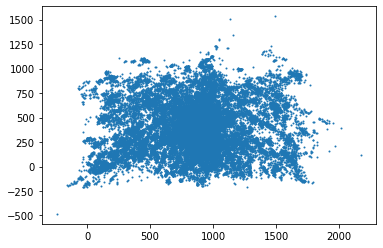

In [10]:
plt.scatter(x_val,y_val,s=1)
plt.show()

In [9]:
durations_all_series= []
for j in range(len(all_series)):
    new_array = []
    current_array = np.array(all_series[j].dropna(subset=['Gaze point X'])['Eye movement type'])
    for i in range(len(current_array)):
        if current_array[i] == 'Saccade':
            new_array.append(1)
        elif current_array[i] == 'Fixation':
            new_array.append(0)
        elif current_array[i]  == 'Unclassified':
            new_array.append(-1)
        elif current_array[i] == 'EyesNotFound':
            new_array.append(-2)
    durations_all_series.append(new_array)

NameError: name 'all_series' is not defined

In [11]:
type = test.iloc[:, 79:80].values
print(type)
print(len(type))
print(type[13])

if (type[13] == 'Fixation'):
    print("It works")

x_val = test.iloc[:, 39:40].values
print(x_val)

y_val = test.iloc[:, 40:41].values
print(y_val)

[[nan]
 ['Unclassified']
 ['EyesNotFound']
 ...
 ['Unclassified']
 ['Unclassified']
 [nan]]
46556
['Fixation']
It works
[[ nan]
 [412.]
 [ nan]
 ...
 [935.]
 [924.]
 [ nan]]
[[  nan]
 [1037.]
 [  nan]
 ...
 [ 639.]
 [ 626.]
 [  nan]]


In [12]:
list1 = []
list2 = []

x = 1

if (x == 1):
    list1.append(x_val[6])
    list2.append(y_val[6])
    
print(list1)
print(list2)

[array([301.])]
[array([1076.])]


In [13]:
x_fix = []
y_fix = []

x_sac = []
y_sac = []

t_stamps = test.iloc[:, 0:1].values

print(t_stamps)

sac_timestamp = []
fix_timestamp = []

leg = int(len(type)*0.1)
print(leg)

for i in range (leg):
    if type[i] == 'Fixation':
        x_fix.append(x_val[i])
        y_fix.append(y_val[i])
        fix_timestamp.append(t_stamps[i])
        
    elif type[i] == 'Saccade':
        x_sac.append(x_val[i])
        y_sac.append(y_val[i])
        sac_timestamp.append(t_stamps[i])
        
    else:
        pass
    
print("X/Y Fixation Points")

#print(x_fix)
#print(y_fix)

print("X/Y Saccade Points")

#print(x_sac)
#print(y_sac)

print("Timestamps")
print(sac_timestamp)
print(fix_timestamp)
        

[[        0]
 [   126524]
 [   134831]
 ...
 [228277557]
 [228285927]
 [228445165]]
4655
X/Y Fixation Points
X/Y Saccade Points
Timestamps
[array([176467], dtype=int64), array([184806], dtype=int64), array([318133], dtype=int64), array([326474], dtype=int64), array([718187], dtype=int64), array([720650], dtype=int64), array([726472], dtype=int64), array([734815], dtype=int64), array([736657], dtype=int64), array([743189], dtype=int64), array([751482], dtype=int64), array([752664], dtype=int64), array([759808], dtype=int64), array([768200], dtype=int64), array([768661], dtype=int64), array([776518], dtype=int64), array([1093200], dtype=int64), array([1096687], dtype=int64), array([1101541], dtype=int64), array([1109032], dtype=int64), array([1109928], dtype=int64), array([1118202], dtype=int64), array([1119794], dtype=int64), array([1120671], dtype=int64), array([1640609], dtype=int64), array([1643196], dtype=int64), array([1651531], dtype=int64), array([1718250], dtype=int64), array([1

[array([193130], dtype=int64), array([201515], dtype=int64), array([209796], dtype=int64), array([218196], dtype=int64), array([226520], dtype=int64), array([234793], dtype=int64), array([243132], dtype=int64), array([251471], dtype=int64), array([259796], dtype=int64), array([268128], dtype=int64), array([276473], dtype=int64), array([284798], dtype=int64), array([293131], dtype=int64), array([301467], dtype=int64), array([309799], dtype=int64), array([784615], dtype=int64), array([784810], dtype=int64), array([793158], dtype=int64), array([800667], dtype=int64), array([801521], dtype=int64), array([809818], dtype=int64), array([816621], dtype=int64), array([818206], dtype=int64), array([826500], dtype=int64), array([832618], dtype=int64), array([834885], dtype=int64), array([843154], dtype=int64), array([848665], dtype=int64), array([851563], dtype=int64), array([859826], dtype=int64), array([864615], dtype=int64), array([868161], dtype=int64), array([876540], dtype=int64), array([88

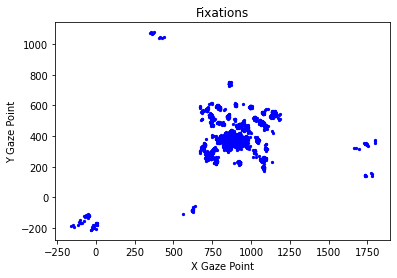

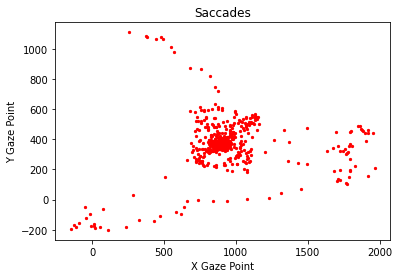

In [14]:
plt.scatter(x_fix,y_fix, c = 'blue', s = 5)
plt.title("Fixations")
plt.xlabel("X Gaze Point")
plt.ylabel("Y Gaze Point")
plt.savefig("total fixations")
plt.show()


plt.scatter(x_sac,y_sac, c = 'red', s = 5)
plt.title("Saccades")
plt.xlabel("X Gaze Point")
plt.ylabel("Y Gaze Point")
plt.savefig("total saccades")
plt.show()


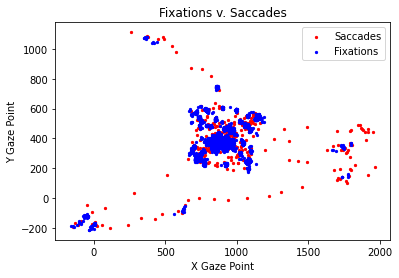

In [15]:
plt.scatter(x_sac,y_sac, c = 'red', s = 5)
plt.scatter(x_fix,y_fix, c = 'blue', s = 5)
plt.xlabel("X Gaze Point")
plt.ylabel("Y Gaze Point")
plt.title("Fixations v. Saccades")
plt.legend(['Saccades','Fixations'])
plt.savefig("Fixations v Saccades v1")
plt.show()

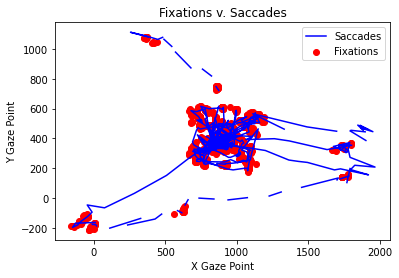

In [16]:
plt.plot(x_sac,y_sac, c = 'blue')
plt.scatter(x_fix,y_fix, c = 'red')
plt.xlabel("X Gaze Point")
plt.ylabel("Y Gaze Point")
plt.title("Fixations v. Saccades")
plt.legend(['Saccades', 'Fixations'])
plt.savefig("Fixations v Saccades v2")
plt.show()

In [85]:
#Displacement

disP = []  
x_Len = []
y_Len = []

def displacement_p(x_p,y_p):

    for i in range(len(x_fix)-1):
    
        x_Len.append(x_p[i+1] - x_p[i])
    
        y_Len.append(y_p[i+1] - y_p[i])
        
        disP.append(np.sqrt(x_Len[i]**2 + y_Len[i]**2))
        
print(x_Len)
print(y_Len)
print(disP)

In [86]:
#Velocity

time_delta = []

velo = []

def velocity_p(time_p):
    
    for i in range(len(time)-1):
    
        time_delta.append(fix_timestamp[i+1] - fix_timestamp[i])
        
        velo.append(disP[i]/time_delta[i])
        
    print(time_delta)
    print(velo)
        

In [ ]:
print(x_fixLen[1])
print(x_fix[1])
print(x_fix[2])
print(y_fixLen[1])
print(y_fix[1])
print(y_fix[2])
print(disP[1])
print(disP)


In [12]:
#Velocity

#time_delta = []
    
#velo = []
    
#for i in range(len(fix_timestamp)-1):
    
    #time_delta.append(fix_timestamp[i+1] - fix_timestamp[i])
        
    #velo.append(disP[i]/time_delta[i])

#print(time_delta[10])
#print(velo[10])
#print(time_delta)
#print(velo)

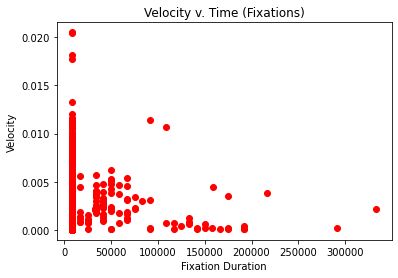

In [17]:
#Displacement

fix_disP = []  
x_fixLen = []
y_fixLen = []
    
for i in range(len(x_fix)-1):
    
    x_fixLen.append(x_fix[i+1] - x_fix[i])
    
    y_fixLen.append(y_fix[i+1] - y_fix[i])
        
    fix_disP.append(np.sqrt(x_fixLen[i]**2 + y_fixLen[i]**2))
    
    
#Velocity

fix_time_delta = []
    
fix_velo = []
    
for i in range(len(fix_timestamp)-1):
    
    fix_time_delta.append(fix_timestamp[i+1] - fix_timestamp[i])
        
    fix_velo.append(fix_disP[i]/fix_time_delta[i])
    

plt.scatter(fix_time_delta,fix_velo, c = 'red')
plt.xlabel("Fixation Duration")
plt.ylabel("Velocity")
plt.title("Velocity v. Time (Fixations)")
plt.savefig("Fixations_velo")
plt.show()


c:\python39\lib\site-packages\matplotlib\axes\_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\python39\lib\site-packages\matplotlib\axes\_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


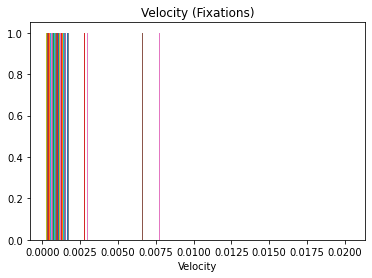

In [14]:
plt.hist(fix_velo)
plt.xlabel("Velocity")
plt.title("Velocity (Fixations)")
plt.savefig("Fixations_velo_hist")
plt.show()


In [13]:
#displace_p(x_sac,y_sac)

#velocity_p(sac_timestamp)

#print(time_delta)
#print(velo)


In [96]:
#Displacement

#disP = []  
#x_sacLen = []
#y_sacLen = []
    
#for i in range(len(x_sac)-1):
    
    #x_sacLen.append(x_sac[i+1] - x_sac[i])
    
    #y_sacLen.append(y_sac[i+1] - y_sac[i])
        
    #disP.append(np.sqrt(x_sacLen[i]**2 + y_sacLen[i]**2))

In [97]:
#Velocity

#time_delta = []
    
#velo = []
    
#for i in range(len(sac_timestamp)-1):
    
    #time_delta.append(sac_timestamp[i+1] - sac_timestamp[i])
        
    #velo.append(disP[i]/time_delta[i])

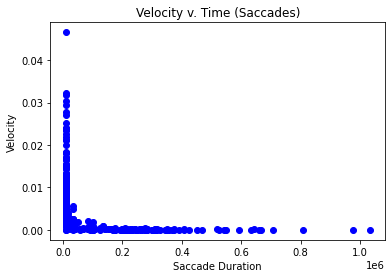

In [18]:
#Displacement

sac_disP = []  
x_sacLen = []
y_sacLen = []
    
for i in range(len(x_sac)-1):
    
    x_sacLen.append(x_sac[i+1] - x_sac[i])
    
    y_sacLen.append(y_sac[i+1] - y_sac[i])
        
    sac_disP.append(np.sqrt(x_sacLen[i]**2 + y_sacLen[i]**2))

    
#Velocity

sac_time_delta = []
    
sac_velo = []
    
for i in range(len(sac_timestamp)-1):
    
    sac_time_delta.append(sac_timestamp[i+1] - sac_timestamp[i])
        
    sac_velo.append(sac_disP[i]/sac_time_delta[i])


plt.scatter(sac_time_delta,sac_velo, c = 'blue')
#plt.xlim(0, 20000)
#plt.ylim(1, 0.01)
plt.xlabel("Saccade Duration")
plt.ylabel("Velocity")
plt.title("Velocity v. Time (Saccades)")
plt.savefig("Saccades_velo")
plt.show()


c:\python39\lib\site-packages\matplotlib\axes\_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\python39\lib\site-packages\matplotlib\axes\_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


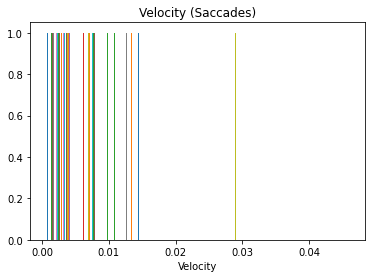

In [17]:
plt.hist(sac_velo)
plt.xlabel("Velocity")
plt.title("Velocity (Saccades)")
plt.savefig("Saccades_velo_hist")
plt.show()


In [19]:
print(len(sac_velo))
sac_timestamp.pop(0)
print(len(sac_timestamp))

569
569


In [20]:
print(len(fix_velo))
fix_timestamp.pop(0)
print(len(fix_timestamp))

3670
3670


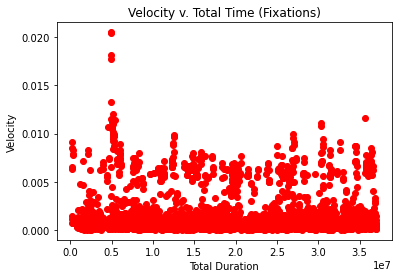

Average Velocity: [0.00135489]


In [21]:
plt.scatter(fix_timestamp,fix_velo, c = 'red')
plt.xlabel("Total Duration")
plt.ylabel("Velocity")
plt.title("Velocity v. Total Time (Fixations)")
plt.savefig("Fixations_velo_tottime")
plt.show()

f_velo_tot = 0

for j in range (len(fix_velo)):
    
    if math.isnan(fix_velo[j]):
        pass
    else:
        f_velo_tot = f_velo_tot + fix_velo[j]
    
f_velo_avg = f_velo_tot/len(fix_velo)

print("Average Velocity: " + str(f_velo_avg))

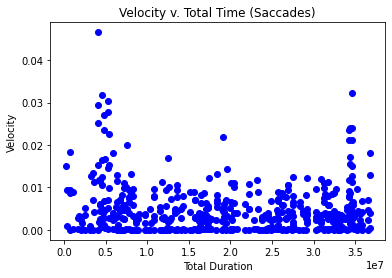

Average Velocity: [0.00433574]


In [22]:
plt.scatter(sac_timestamp,sac_velo, c = 'blue')
#plt.xlim(0, 20000)
#plt.ylim(1, 0.01)
plt.xlabel("Total Duration")
plt.ylabel("Velocity")
plt.title("Velocity v. Total Time (Saccades)")
plt.savefig("Saccades_velo_tottime")
plt.show()

s_velo_tot = 0

for j in range (len(sac_velo)):
    
    if math.isnan(sac_velo[j]):
        pass
    else:
        s_velo_tot = s_velo_tot + sac_velo[j]
    
s_velo_avg = s_velo_tot/len(sac_velo)

print("Average Velocity: " + str(s_velo_avg))

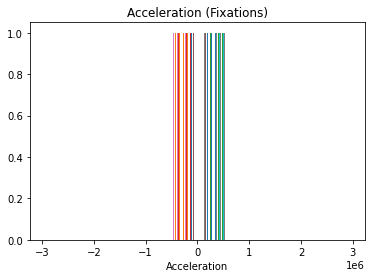

In [23]:
#Accelerattion
    
fix_accel = []

fa_timestamp = []

fix_velo_delta = []
    
for i in range(len(fix_velo)-1):
        
    fix_velo_delta.append(fix_velo[i+1] - fix_velo[i])
    
    if (fix_velo_delta[i] == 0): #Divide by zero is not possible
        pass
    
    else:
        fix_accel.append(fix_disP[i]/fix_velo_delta[i])
        fa_timestamp.append(fix_timestamp[i+1])

#print(fix_accel)

plt.hist(fix_accel,range=[-3000000,3000000])
plt.xlabel("Acceleration")
plt.title("Acceleration (Fixations)")
plt.savefig("Fixations_accel_hist")
plt.show()


In [24]:
#Run this first

print(len(fa_timestamp))
print(len(fix_accel))

3664
3664


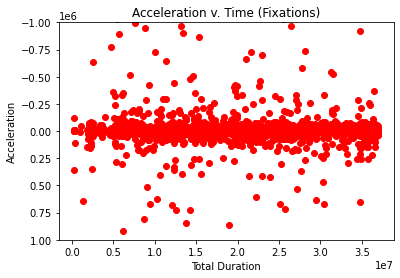

Average Velocity: [46325.65276665]


In [25]:
plt.scatter(fa_timestamp,fix_accel, c = 'red')
#plt.xlim(0, 20000)
plt.ylim(1000000, -1000000)
plt.xlabel("Total Duration")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Time (Fixations)")
plt.savefig("Fixations_accel")
plt.show()

f_accel_tot = 0

for j in range (len(fix_accel)):
    
    if math.isnan(fix_accel[j]):
        pass
    else:
        f_accel_tot = f_accel_tot + fix_accel[j]
    
f_accel_avg = f_accel_tot/len(fix_accel)

print("Average Acceleration: " + str(f_accel_avg))

c:\python39\lib\site-packages\matplotlib\axes\_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\python39\lib\site-packages\matplotlib\axes\_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


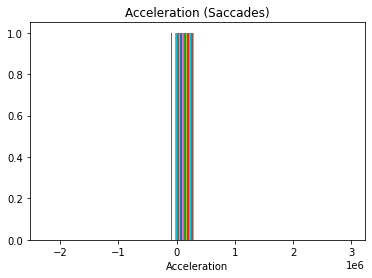

In [26]:
#Accelerattion
    
sac_accel = []

sa_timestamp = []

sac_velo_delta = []
    
for i in range(len(sac_velo)-1):
        
    sac_velo_delta.append(sac_velo[i+1] - sac_velo[i])
    
    if (sac_velo_delta[i] == 0): #Divide by zero is not possible
        pass
    
    else:
        sac_accel.append(sac_disP[i]/sac_velo_delta[i])
        sa_timestamp.append(sac_timestamp[i+1])
            
#print(sac_accel) 

plt.hist(sac_accel)
plt.xlabel("Acceleration")
plt.title("Acceleration (Saccades)")
plt.savefig("Saccades_accel_hist")
plt.show()


In [27]:
#Run this first

sac_timestamp.pop(-1)
print(len(sac_timestamp))
print(len(sac_accel))

568
568


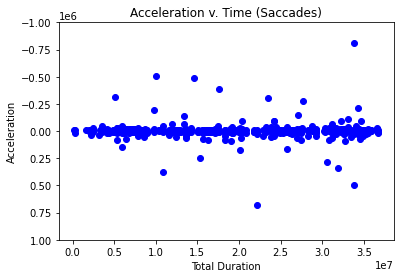

Average Velocity: [3957.96932446]


In [28]:
plt.scatter(sac_timestamp,sac_accel, c = 'blue')
#plt.xlim(0, 20000)
plt.ylim(1000000, -1000000)
plt.xlabel("Total Duration")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Time (Saccades)")
plt.savefig("Saccades_accel")
plt.show()

s_accel_tot = 0

for j in range (len(sac_accel)):
    
    if math.isnan(sac_accel[j]):
        pass
    else:
        s_accel_tot = s_accel_tot + sac_accel[j]
    
s_accel_avg = s_accel_tot/len(sac_accel)

print("Average Acceleration: " + str(s_accel_avg))

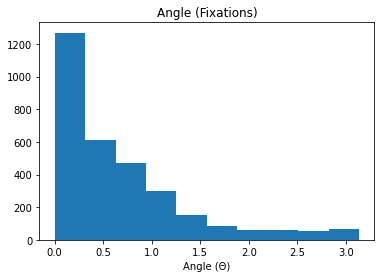

In [29]:
#Angle
    
fix_theta = []

f_numer = []

f_denom = []

ang_time_f = []
    
for i in range(len(fix_disP)-1): 
    
    top = (x_fixLen[i+1] * y_fixLen[i]) + (x_fixLen[i+1] * y_fixLen[i+1])
    
    if math.isnan(top):
        pass
    else:
        f_numer.append(top)
    
    bottom = (fix_disP[i] * fix_disP[i+1])
    
    if math.isnan(bottom):
        pass
    else:
        f_denom.append(bottom)
    
for j in range(len(f_numer)):
    
    #print(numer[j]/denom[j])
    if (f_denom[j] == 0):
        pass
    else:
        fix_cos = math.cos(f_numer[j]/f_denom[j])
        fix_theta.append(math.acos(fix_cos))
        ang_time_f.append(fix_timestamp[j+1])

plt.hist(fix_theta)
plt.xlabel("Angle (Θ)")
plt.title("Angle (Fixations)")
plt.savefig("Fixations_angle_hist")
plt.show()    


In [30]:
print(len(ang_time_f))
print(len(fix_theta))

3131
3131


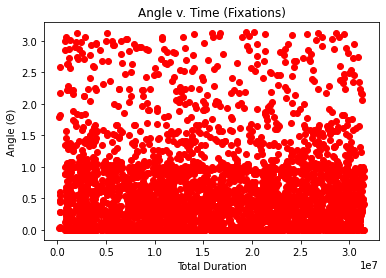

Average Angle: 0.6523174534702068 rad


In [31]:
plt.scatter(ang_time_f,fix_theta, c = 'red')
#plt.xlim(0, 20000)
#plt.ylim(1, 0.01)
plt.xlabel("Total Duration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Time (Fixations)")
plt.savefig("Fixations_angle")
plt.show()

f_theta_tot = 0

for j in range (len(fix_theta)):
    
    if math.isnan(fix_theta[j]):
        pass
    else:
        f_theta_tot = f_theta_tot + fix_theta[j]
    
f_theta_avg = f_theta_tot/len(fix_theta)

print("Average Angle: " + str(f_theta_avg) + " rad")

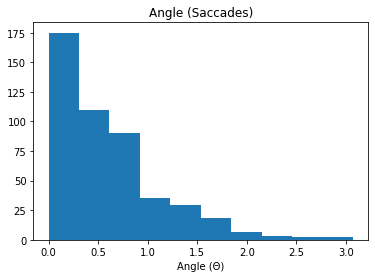

In [32]:
#Angle
    
sac_theta = []

s_numer = []

s_denom = []

ang_time_s = []
    
for i in range(len(sac_disP)-1): 
    
    top = (x_sacLen[i+1] * y_sacLen[i]) + (x_sacLen[i+1] * y_sacLen[i+1])
    
    if math.isnan(top):
        pass
    else:
        s_numer.append(top)
    
    bottom = (sac_disP[i] * sac_disP[i+1])
    
    if math.isnan(bottom):
        pass
    else:
        s_denom.append(bottom)
    
for j in range(len(s_numer)):
    
    #print(numer[j]/denom[j])
    if (s_denom[j] == 0):
        pass
    else:
        sac_cos = math.cos(s_numer[j]/s_denom[j])
        sac_theta.append(math.acos(sac_cos))
        ang_time_s.append(fix_timestamp[j+1])
    
plt.hist(sac_theta)
plt.xlabel("Angle (Θ)")
plt.title("Angle (Saccades)")
plt.savefig("Saccades_angle_hist")
plt.show()    


In [33]:
print(len(ang_time_s))
print(len(sac_theta))

471
471


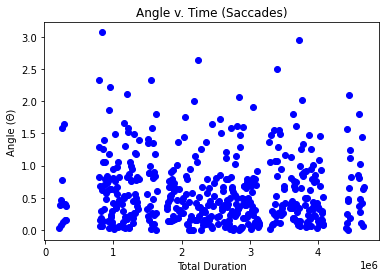

Average Angle: 0.5942996328441477 rad


In [34]:
plt.scatter(ang_time_s,sac_theta, c = 'blue')
#plt.xlim(0, 20000)
#plt.ylim(1, 0.01)
plt.xlabel("Total Duration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Time (Saccades)")
plt.savefig("Saccades_angle")
plt.show()

s_theta_tot = 0

for j in range (len(sac_theta)):
    
    if math.isnan(sac_theta[j]):
        pass
    else:
        s_theta_tot = s_theta_tot + sac_theta[j]
    
s_theta_avg = s_theta_tot/len(sac_theta)

print("Average Angle: " + str(s_theta_avg) + " rad")

In [52]:
for i in range(97):
    sac_velo.pop(0)
print(len(sac_velo))
print(len(sac_theta))

for i in range(533):
    fix_velo.pop(0)
print(len(fix_velo))
print(len(fix_theta))

471
471
3131
3131


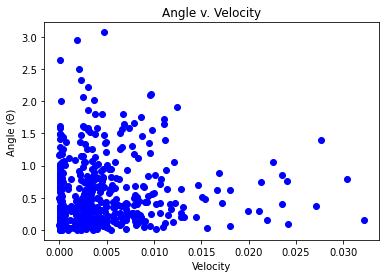

In [53]:
plt.scatter(sac_velo,sac_theta, c = 'blue')
plt.xlabel("Velocity")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Velocity")
plt.savefig("Angle_Velocity_Sac")
plt.show()

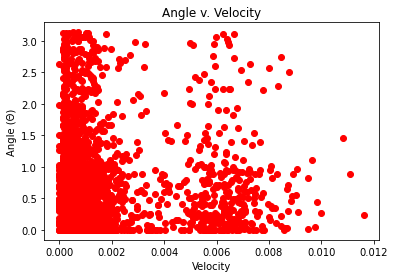

In [54]:
plt.scatter(fix_velo,fix_theta, c = 'red')
plt.xlabel("Velocity")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Velocity")
plt.savefig("Angle_Velocity_Fix")
plt.show()

In [47]:
#for i in range(97):
    #sac_accel.pop(0)
print(len(sac_accel))
print(len(sac_theta))

for i in range(533):
    fix_accel.pop(0)
print(len(fix_accel))
print(len(fix_theta))

471
471
3131
3131


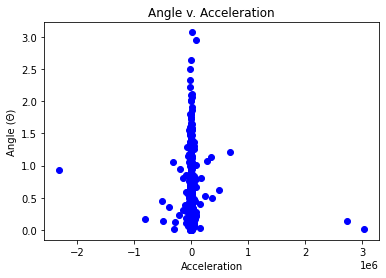

In [50]:
plt.scatter(sac_accel,sac_theta, c = 'blue')
plt.xlabel("Acceleration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Acceleration")
plt.savefig("Angle_Acceleration_Sac")
plt.show()

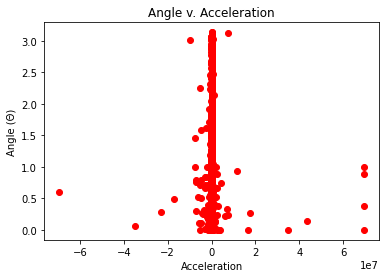

In [49]:
plt.scatter(fix_accel,fix_theta, c = 'red')
plt.xlabel("Acceleration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Acceleration")
plt.savefig("Angle_Acceleration_Fix")
plt.show()

In [39]:
print(len(sac_accel))
print(len(sac_velo))
sac_velo.pop(0)
print(len(fix_accel))
print(len(fix_velo))

for i in range(6):
    fix_velo.pop(0)
    
print(len(fix_velo))

568
569
3664
3670
3664


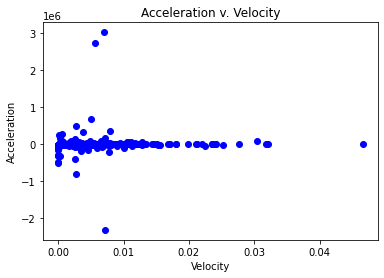

In [41]:
plt.scatter(sac_velo,sac_accel, c = 'blue')
plt.xlabel("Velocity")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Velocity")
plt.savefig("Acceleration_Velocity_Sac")
plt.show()

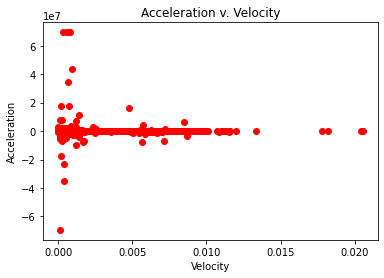

In [42]:
plt.scatter(fix_velo,fix_accel, c = 'red')
plt.xlabel("Velocity")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Velocity")
plt.savefig("Acceleration_Velocity_Fix")
plt.show()